# <center>Web Scraping for Market Analysis of Drugs</center>

### 1. Loading Dependencies

In [218]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import requests
from bs4 import BeautifulSoup 
import numpy as np
import pandas as pd
import re
from decimal import Decimal
import csv
import os
import string
import math
import matplotlib.pyplot as plt

### 2. Searching the drugs by category
We are using the link from WebMD to get top 5 drugs for the specified category. Here we have used "Chronic Pain" as our category and have obtained top 5 drugs after applying some optimization techniques.

In [219]:
page=requests.get("https://www.webmd.com/drugs/2/condition-3090/chronic%20pain") #Searching drugs by condition
soup=BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [220]:
#print(containers[0])
containers = soup.findAll("table", {"class": "drugs-treatments-table"})   #getting the name and review number of drugs
c = containers[0]

### 3. Collecting the links to obtain drug ID's names and the number of reviews.

In [221]:
links=c.find_all("a",href=re.compile("drugreview"))    #using 'drugview' substring to avoid repetition of links
links[0]
for link in links:
    print(link.get('href'))                            #Need to extract drug-id to put in final table and use in the link

<a href="/drugs/drugreview-4398-tramadol-hcl.aspx?drugid=4398&amp;drugname=tramadol-hcl">2904 Reviews</a>

/drugs/drugreview-4398-tramadol-hcl.aspx?drugid=4398&drugname=tramadol-hcl
/drugs/drugreview-4398-tramadol-hcl-er.aspx?drugid=4398&drugname=tramadol-hcl-er
/drugs/drugreview-1025-oxycodone-hcl.aspx?drugid=1025&drugname=oxycodone-hcl
/drugs/drugreview-1025-oxycodone-hcl-concentrate.aspx?drugid=1025&drugname=oxycodone-hcl-concentrate
/drugs/drugreview-1025-oxycodone-hcl-er.aspx?drugid=1025&drugname=oxycodone-hcl-er
/drugs/drugreview-1025-oxycodone-tablet-only.aspx?drugid=1025&drugname=oxycodone-tablet-only
/drugs/drugreview-2798-oxycontin.aspx?drugid=2798&drugname=oxycontin
/drugs/drugreview-64741-suboxone-film-medicated.aspx?drugid=64741&drugname=suboxone-film-medicated
/drugs/drugreview-64741-suboxone-tablet.aspx?drugid=64741&drugname=suboxone-tablet
/drugs/drugreview-2671-methadone-hcl.aspx?drugid=2671&drugname=methadone-hcl
/drugs/drugreview-2671-methadone-hcl-tablet.aspx?drugid=2671&drugname=methadone-hcl-tablet
/drugs/drugreview-2671-methadone-hcl-tablet-soluble.aspx?drugid=2671&dr

In [222]:
st=[]
did=[]
for link in links:
    st=(link.get('href'))                            #Need to extract drug-id to put in final table and use in the link
    loc = st.find("drugid=") + 7
    temp = ""
    while(True):
        if st[loc]=="&":
            break
        else:
            temp = temp + st[loc]
            loc = loc + 1
    did.append(temp)
    
print(did)

['4398', '4398', '1025', '1025', '1025', '1025', '2798', '64741', '64741', '2671', '2671', '2671', '144617', '327', '327', '327', '327', '327', '1507', '1509', '32971', '94892', '75100', '155153', '156955', '64748', '152917', '92576', '144614', '144614', '171739', '167438', '9730', '9730', '9730', '64740', '64740', '1508', '4101', '152125', '165699', '11996', '164754', '152562', '152562', '5360', '170329', '387', '18450', '166704', '4105', '155016', '63814', '9143', '156872', '92515', '9480', '9480', '4149', '165341', '165341', '61838', '156918', '4876', '152909', '152569', '406', '13733', '61833', '163158', '57795', '170175', '171738', '4100', '166431', '94727', '170241', '78328', '155959', '148740', '13732', '13735', '977', '977', '61834', '61835', '1925', '171613', '154348', '148312', '170232', '94724', '22001', '9383', '165098', '166836', '173366', '170300', '10683']


In [223]:
#c.findAll('a')
drug=c.find_all("a", href=re.compile("details"))          #Getting drugnames
dlist=[]
for i in range(12):
    l=drug[i].text
    dlist.append(l)
print(dlist)

['tramadol HCL', 'tramadol HCL ER', 'oxycodone HCL Solution', 'oxycodone HCL', 'oxycodone HCL ER', 'oxycodone tablet, oral ONLY', 'OxyContin', 'Suboxone Film, Medicated', 'Suboxone Tablet, Sublingual', 'methadone HCL', 'methadone HCL Solution', 'methadone HCL Tablet, Soluble']


In [224]:
rlist=[]
for i in range(12):                                       #Getting number of reviews for each drug
    review=c.find_all("a", href=re.compile("drugreview"))
    r=review[i].text.split(" ")
    rlist.append(r[0])
print(rlist)


['2904', '2904', '1951', '1951', '1951', '1951', '1462', '1162', '1162', '1134', '1134', '1134']


### 4. Creating a dataframe of top 5 drugs by eliminating duplicates

In [225]:
df = pd.DataFrame(                                       #Creating a df of drug name and number of reviews for that drug
    {'Drug': dlist,
     'Reviews': rlist,
     'Drug_ID' : did[0:12],
    })
#drug_list
drugsv = df.drop_duplicates(subset='Reviews', keep="first")       #Drop duplicates

In [226]:
drugsv.to_csv('/Users/grv/Documents/Fall 18/660/Project/result1.csv')

### 5. Function to Iterate over the strings to be replaced

In [227]:
def replaceMultiple(mainString, toBeReplaces, newString):
    # Iterate over the strings to be replaced
    for elem in toBeReplaces :
        # Check if string is in the main string
        if elem in mainString :
            # Replace the string
            mainString = mainString.replace(elem, newString)
    
    return  mainString

### 6. Scrapping
The data for the drug name is scrapped from the webpage. It includes the reviews, ratings in 3 different categories and comments. The scrapped data is written to the csv file that is saved on the local machine. We currently are working on a sample of first 1000 records for computational convenience.


In [228]:
pages = [str(i) for i in range(200)]
filename= "reviews6.csv"
f = open(filename, "w")
headers = "Reviewer Details, Effectiveness Rating, Ease_of_Use Rating, Satisfaction Rating, Comment\n"
f.write(headers)
for page in pages:
    url1 = 'https://www.webmd.com/drugs/drugreview-4398-tramadol+oral.aspx?drugid=4398&drugname=tramadol+oral&pageIndex='+page+'&sortby=3&conditionFilter=-1'
    page=requests.get(url1)
    soup=BeautifulSoup(page.content, 'html.parser')
    con1 = soup.findAll("div", {"class": "userPost"})
    con2 = con1[1]
    r_details = con2.p.text
    ratings = con2.findAll("p", {"class" : "inlineRating starRating"})
    r_effec = ratings[0].text
    r_ease = ratings[1].text
    r_satis = ratings[2].text
    comment = con2.findAll("p", {"class" : "comment"})
    r_comment = comment[1].text
    
    filename= "reviews6.csv"
    f = open(filename, "a")
    for con2 in con1:
        r_details = con2.p.text
        ratings = con2.findAll("p", {"class" : "inlineRating starRating"})
        r_effec = ratings[0].text
        r_ease = ratings[1].text
        r_satis = ratings[2].text
        comment = con2.findAll("p", {"class" : "comment"})
        r_comment = comment[1].text
        
        f.write(r_details.replace("," , "|") + "," + r_effec[-1] + "," + r_ease[-1] + "," + r_satis[-1] + ","  + 
                                replaceMultiple(r_comment,['\r\n', ','], "|") + "\n")
        
        
        
f.close()

89

139

449

242

803

208

1605

111

374

153

417

261

427

513

290

385

1080

152

642

226

277

207

428

157

243

275

392

1194

249

377

172

153

782

335

249

160

390

226

120

115

337

1413

346

1409

98

143

244

65

981

360

102

303

467

342

1223

106

247

238

294

247

563

633

54

699

287

130

317

115

330

982

100

170

353

229

97

736

234

223

259

788

246

267

331

261

247

246

346

324

330

113

517

423

195

750

206

475

256

196

640

338

282

119

81

298

367

812

323

494

769

111

101

410

616

190

362

185

145

442

122

301

515

522

457

318

305

224

558

280

380

1073

456

205

608

106

200

131

120

1328

421

284

429

241

294

565

540

231

407

708

694

174

629

225

1312

266

177

332

115

691

186

625

355

527

187

431

405

813

122

250

344

433

208

1035

212

236

190

238

154

189

135

184

112

102

785

198

892

305

270

432

107

408

964

1214

792

383

454

306

244

294

631

696

407

528

96

249

568

313

398

687

248

734

359

174

435

240

475

248

479

336

290

259

476

175

740

121

843

370

880

340

310

172

102

394

437

355

149

567

191

355

206

213

203

1419

308

188

118

90

110

476

319

108

355

98

249

137

166

207

107

98

329

391

229

128

307

399

277

350

124

181

186

280

251

382

340

247

282

235

119

205

232

589

165

207

107

210

197

187

99

156

268

175

194

128

120

621

199

718

504

426

466

386

253

458

201

291

441

490

411

515

434

102

265

186

261

118

283

123

279

322

114

71

668

108

1092

416

247

539

420

366

145

107

662

98

215

145

157

157

1368

67

342

422

457

214

325

169

654

305

212

672

433

235

256

161

247

112

303

416

1031

1223

139

288

143

104

169

2113

374

405

359

223

535

259

330

134

339

187

249

247

513

1059

144

108

357

470

324

285

103

280

111

313

411

102

264

359

236

184

305

311

101

107

227

840

185

227

342

130

464

202

194

115

43

164

43

226

527

150

201

102

203

316

235

429

679

112

242

177

179

435

91

355

127

317

338

126

429

314

137

421

165

237

121

136

396

278

278

106

179

424

285

559

654

122

226

190

367

352

189

116

263

321

142

599

157

722

164

110

313

380

160

509

121

222

465

138

220

167

169

340

120

644

391

116

619

380

94

153

227

225

128

91

105

193

255

170

431

96

297

219

234

429

306

123

98

98

758

301

114

224

414

245

324

173

868

98

111

890

385

212

309

491

524

304

353

67

473

134

718

312

184

173

523

150

121

157

295

161

92

102

228

188

133

415

226

284

98

216

189

120

108

211

189

1021

142

211

308

336

113

109

699

147

100

575

238

105

193

210

243

135

110

203

208

219

372

181

401

140

455

235

145

478

54

268

114

108

148

1734

67

251

102

601

406

118

411

291

275

183

128

105

647

206

182

98

332

322

388

261

846

105

340

373

115

593

275

335

506

123

111

288

127

300

297

163

252

96

239

249

222

118

656

115

284

153

135

135

120

432

111

121

176

157

236

415

226

204

608

317

918

327

182

419

182

111

650

177

241

117

291

106

419

278

100

323

246

154

505

505

120

213

552

513

160

423

107

166

102

241

194

218

144

199

211

359

180

102

294

403

547

321

299

118

193

292

102

135

682

159

351

272

157

444

357

202

479

410

429

348

255

153

143

382

128

198

380

445

445

132

112

398

258

166

100

220

186

259

67

1053

368

356

364

239

489

184

404

250

107

246

54

105

678

461

115

305

107

343

525

500

352

113

495

392

889

620

60

561

251

463

120

500

534

108

242

538

193

324

910

106

633

111

107

456

229

275

43

104

116

335

552

140

192

111

258

287

352

227

443

335

135

209

140

174

417

398

368

772

216

114

584

342

307

330

235

479

303

291

105

43

112

126

192

185

378

254

268

782

248

212

647

498

656

144

387

160

275

179

142

119

112

96

100

307

930

297

682

212

151

595

235

163

362

183

105

477

188

101

459

102

205

350

390

478

264

203

184

1539

492

309

117

105

143

807

176

423

423

423

466

267

608

1623

452

182

108

498

175

178

168

875

140

420

196

108

719

424

967

218

186

314

139

191

119

152

118

376

110

267

209

155

752

203

476

102

158

572

449

126

398

575

322

394

359

537

217

114

128

352

185

1387

1387

366

1167

157

43

154

359

242

432

199

158

188

254

277

276

1197

166

81

99

202

329

180

176

591

119

501

381

265

107

217

145

357

292

193

292

1501

413

199

776

475

475

98

356

187

248

153

157

166

671

764

105

423

923

162

300

287

527

112

469

102

102

368

173

492

358

246

159

456

368

141

99

111

331

341

220

356

274

200

188

98

102

154

579

117

291

421

261

### 7. Cleaning the data.
The first column has Gender and Age which will be helpful in further Exploratory data anaylsis. Cleaning the 'Comment' and 'Reviewer' part from the columns is carried out to make data more readable and less redudant. Gender is extraced from the Reviewers Details column and saved in new separate column. Extracting Age is a bit of a challenge since we have too many categories to classify(Working on solution).

In [229]:
dataf = pd.read_csv("/Users/grv/reviews6.csv") #Sample data  of 50 entries
data = dataf['Reviewer Details'].tolist()
datac = dataf[' Comment'].tolist()
#data2 = dataf.take([0], axis=1)
#data2

In [230]:
i = 0
idx = 0
temp = []
withoutGenderString = []
withoutGenderStringTemp = []
genderSequence = []
#for i in range(len(data)):
#    temp = re.split(r'\s', data[i])
#    for idx in range(len(temp)):
#        if(temp[idx].lower().find('male') != -1 or temp[idx].lower().find('female') != -1):
#            print('There\'s Something here', idx)
#            print("lower data[i] : ",temp)
#        pass

for i in range(len(data)):
    withoutGenderStringTemp = ""
    genderInstance = ""
    if('male' in data[i].lower() or 'female' in data[i].lower()):
        temp = re.split(r'\s', data[i])
        #print("Something's There : ",i)
        for idx in range(len(temp)):
            tempStr = temp[idx].lower()
            withoutGenderStringTemp = tempStr
            if(tempStr.find('male') != -1):
                genderInstance = "Male"
                #print('There\'s Popping at this index to get the comment without gender', idx)
                withoutGenderStringTemp = ""                           #Getting the comment without Gender 
            if(tempStr.find('female') != -1):
                genderInstance = "Female"
                #print('There\'s Popping at this index to get the comment without gender', idx)
                withoutGenderStringTemp = ""                           #Getting the comment without Gender
                #print("lower data[i] : ",temp)
            withoutGenderStringTemp = "".join(withoutGenderStringTemp)
    else:
        withoutGenderStringTemp = data[i]
        #print("Nothings there : ",i,data[i])
        genderInstance = "NA"
    genderSequence.append(genderInstance)                              #Col-wise gender from the comments
    
    withoutGenderString.append(withoutGenderStringTemp)                #Comments without Gender

#print(withoutGenderString)
#print("-----------------------------------------------------------")
#print(genderSequence)

In [231]:
x=[]
for item in data:
    x.append(item.strip("Reviewer:"))
#print(x)


In [232]:
y=[]
for item in datac:
    yt = (item.strip("Comment:"))
    y.append(yt.strip("Hide Full Comment"))
#print(y)

In [233]:
dataf['Reviewer Details']=x
dataf[' Comment']=y
dataf['Gender'] = genderSequence

In [234]:
dataf

,Reviewer Details,Effectiveness Rating,Ease_of_Use Rating,Satisfaction Rating,Comment,Gender
0,Newbie | 35-44 on Treatment for 1 to 6 months...,2,2,1,Didnâ??t rich the neevevosin ! Wastef,NA
1,45-54 on Treatment for less than 1 month (Pat...,1,5,1,I was prescribed this for the nerve pain that ...,NA
2,Ocetech| 65-74 Male on Treatment for 10 year...,1,4,2,Tramadol does help a bit with the ghost pain i...,Male
3,virleo| 55-64 Female on Treatment for less t...,1,1,1,A few years ago a doctor at an urgent care cli...,Female
4,Diane perrin| 65-74 on Treatment for 2 to les...,5,5,5,I couldn't be happier with this medication. I ...,NA
5,Mtdwnurse1| 45-54 Female on Treatment for 6 ...,4,4,4,After my neck fusion to my cervical C5|6|7| bo...,Female
6,meposide| Male on Treatment for 5 to less t...,1,3,2,,Male
7,FBigPharma| 35-44 on Treatment for 1 to 6 mon...,2,2,1,Try being perscribed 120 20MG OxyCodone a mont...,NA
8,Foots55| 65-74 Female on Treatment for 1 to ...,3,2,2,It’s been ok but had others that worked better,Female
9,GoneRacin24| 65-74 Female on Treatment for 1...,1,5,1,Severe neuropathic pain in left leg into my to...,Female


In [235]:
dataf.to_csv(r'/Users/grv/Downloads/sample.csv')      #Writting to a csv file to get a sample file

### 8. EDA
EDA was just started recently since it took a lot of time to clean data. We still are working on getting more stuctured and clean data to get accurate analysis in our EDA. 

In [236]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Reviewer Details         1000 non-null object
 Effectiveness Rating    1000 non-null int64
 Ease_of_Use Rating      1000 non-null int64
 Satisfaction Rating     1000 non-null int64
 Comment                 1000 non-null object
Gender                   1000 non-null object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


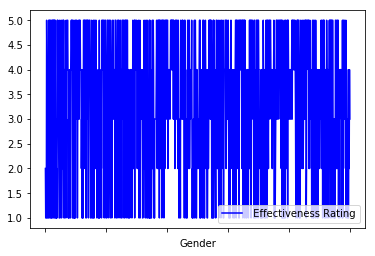

In [237]:
#t=dataf.plot(kind='line',x='Gender',y=' Effectiveness Rating',color='blue')

In [216]:
def count_token(text):                     #Working on Tokenization....(incomplete at the moment)
    #Spliting in tokens
    
    spl=(text.split(" "))
    
    #Converting to lower case
    lowc=(text.lower())
    
    #Creating array to store list
    arr = []
    
    #Creating a dictionary
    dic=dict()
    
    for x in spl: #Removing white spaces and converting to lower case
        x.strip()
        x=x.replace('\n','')
        if len(x) != 0:
            arr.append(x.lower())
            
    for d in arr:
        if d in dic:
            dic[d] = dic[d]+1
        else:
            dic[d]=1  
    return dic

NameError: name 'log' is not defined